# Глава 10

## Задание 10.1.

Изменить пример в chap10.ipynb и убедиться, что дополнение нулями устраняет лишнюю ноту в начале фрагмента.

Чтобы устранить эту проблему, нужно перед вычислением ДПФ добавить достаточно нулей в конец сигнала, эффекта "заворота" можно избежать. Для этого урежем оба сигнала до 2^16 элементов и добавим по нулю до 2^17.

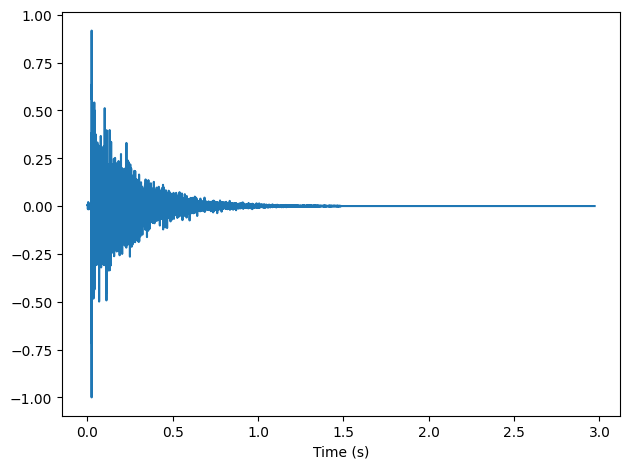

In [1]:
from thinkdsp import read_wave, decorate
import numpy as np
import matplotlib.pyplot as plt

response = read_wave('code_180960__kleeb__gunshot.wav')

start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.truncate(2**16)
response.zero_pad(2**17)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

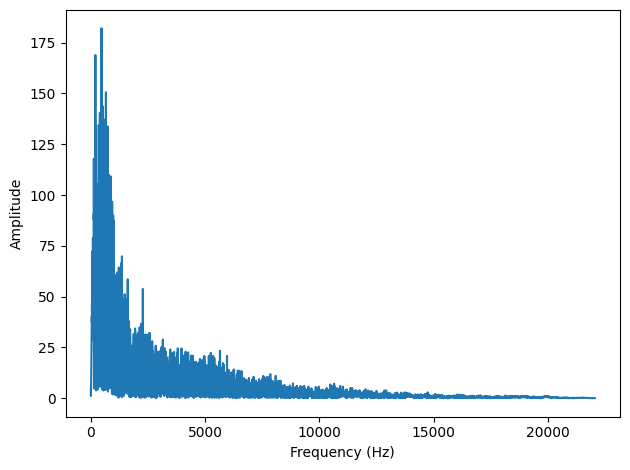

In [2]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

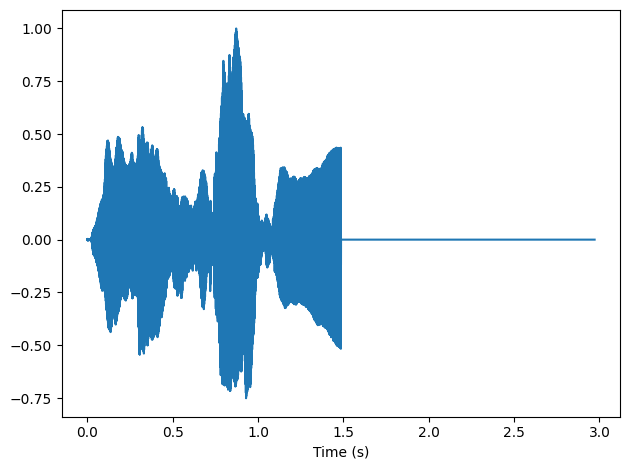

In [3]:
violin = read_wave('code_92002__jcveliz__violin-origional.wav')

start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)

violin.truncate(2**16)
violin.zero_pad(2**17)

violin.normalize()
violin.plot()
decorate(xlabel='Time (s)')

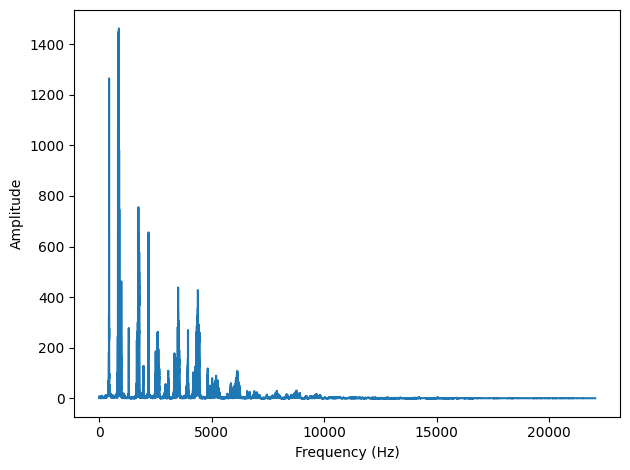

In [4]:
spectrum = violin.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Writing output.wav


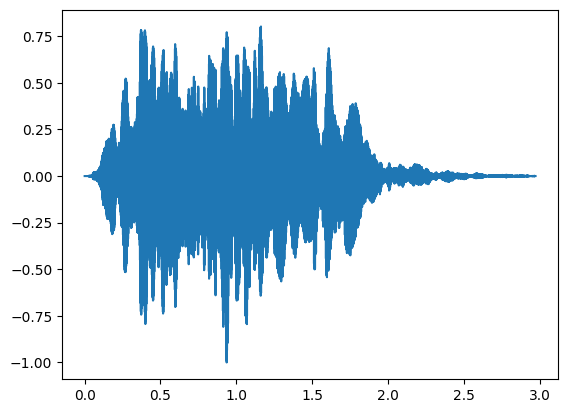

In [5]:
output = (spectrum * transfer).make_wave()
output.normalize()
output.write("output.wav")
output.plot()

И теперь, при прослушивании можно заметить, что мы не слышим лишней ноты в начале.

##  Задание 10.2.

Смоделировать двумя способами звучание записи в том же пространстве, где была измерена импульсная характеристика, как сверткой самой записи с импульсной характеристикой, так и умножением ДПФ записи на вычисленный фильтр, соответствующий импульсной характеристике.

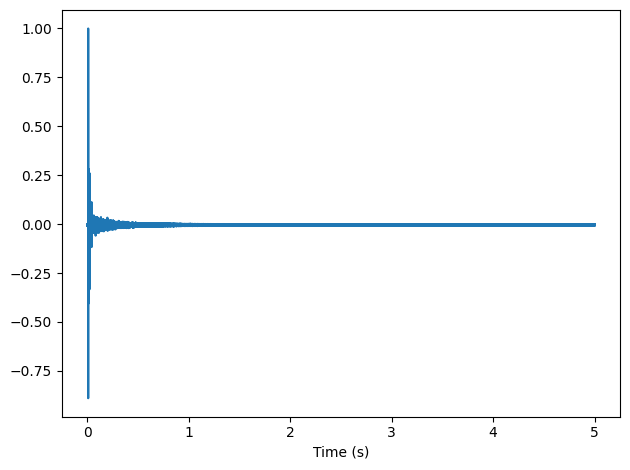

In [6]:
response = read_wave('code_stalbans_a_mono.wav')

start = 0
duration = 5
response = response.segment(duration=duration)
response.shift(-start)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

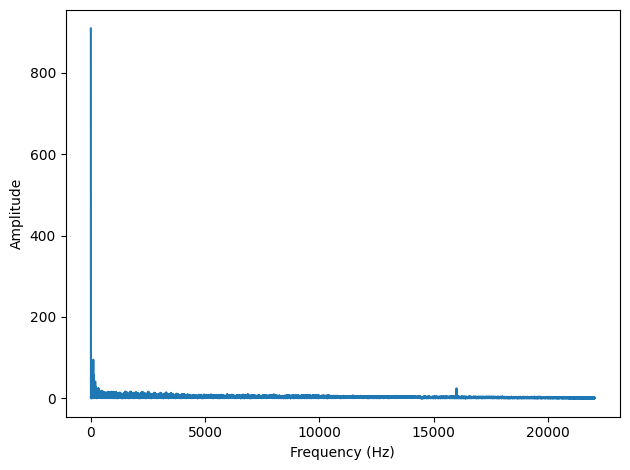

In [7]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

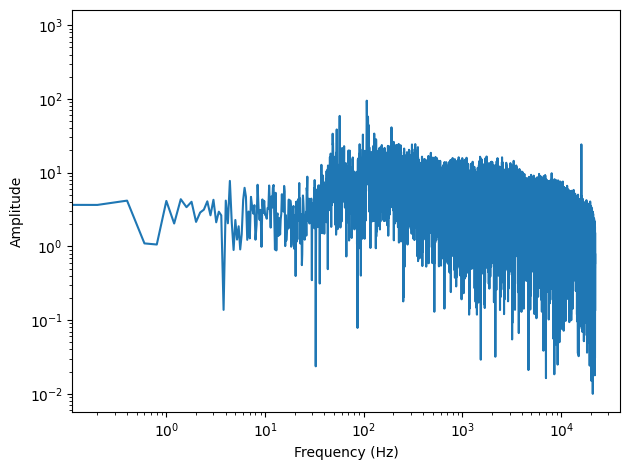

In [8]:
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude',
         xscale='log', yscale='log')

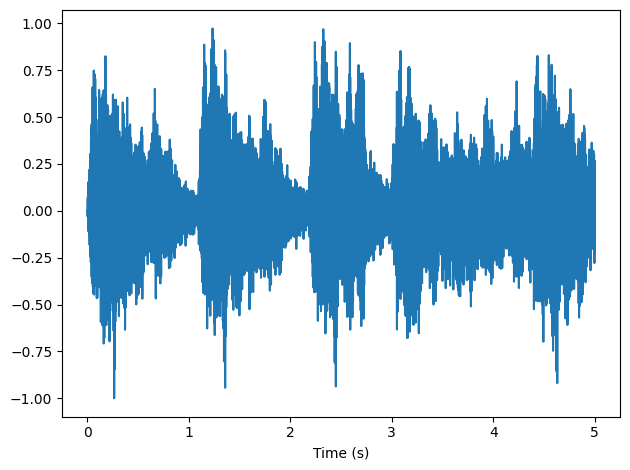

In [9]:
wave = read_wave('code_170255__dublie__trumpet.wav')

start = 0.0
wave = wave.segment(start=start)
wave.shift(-start)

wave.truncate(len(response))
wave.normalize()
wave.plot()
decorate(xlabel='Time (s)')

(110251, 110251)

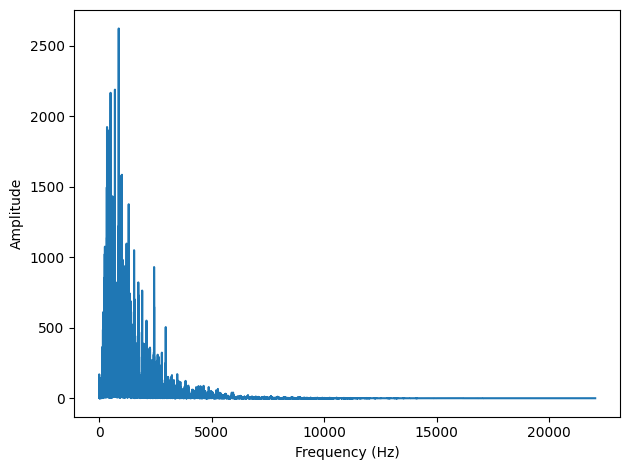

In [10]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')
len(spectrum.hs), len(transfer.hs)

Writing trumpet_output.wav


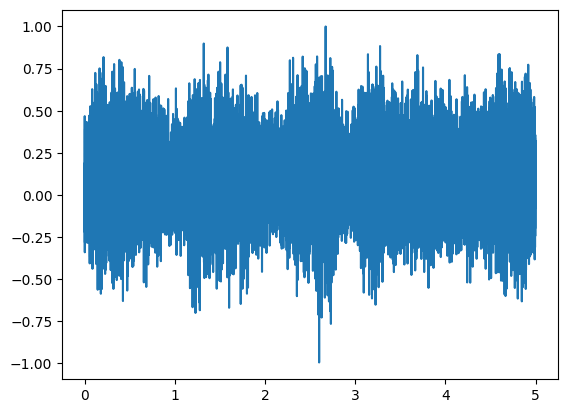

In [11]:
output = (spectrum * transfer).make_wave()
output.normalize()
output.write("trumpet_output.wav")
output.plot()

После того, как мы распознали эту операцию как свертку, мы можем вычислить ее с помощью метода convolve и обрезать для лучше сравнения с первым методом

Writing convolved2.wav


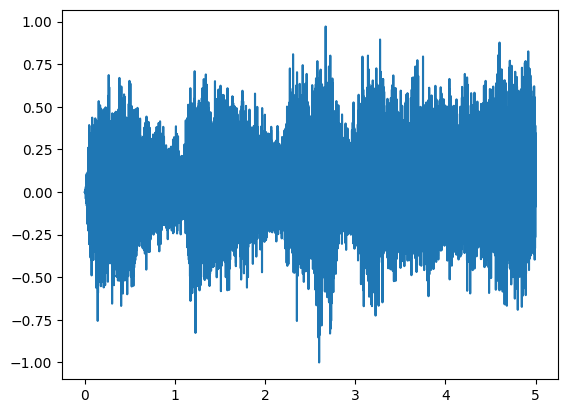

In [12]:
convolved2 = wave.convolve(response)
convolved2 = convolved2.segment(0, 5)
convolved2.normalize()
convolved2.write("convolved2.wav")
convolved2.plot()

При прослушивании полученных результатов обоих способов, можно сделать вывод, что они дают идентичный результат, однако при постоении полученных сигналов видны небольшие различия.